In [1]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

## Read the data

In [2]:
empirical_data = pd.read_csv("homework/radar_parameters.csv", index_col=0)
empirical_data

,Zh (dBZ),Zdr (dB),Ldr (dB),Kdp (deg km-1),Ah (dBZ/km),Adr (dB/km),R (mm/hr)
0,23.144878,0.418637,-41.757733,0.005395,0.000290,0.000012,2.393520
1,22.737156,0.322850,-43.772069,0.005194,0.000360,0.000012,3.502699
2,26.869826,0.330948,-43.577399,0.013385,0.000903,0.000030,8.627561
3,28.540561,0.399480,-42.139731,0.018872,0.001036,0.000043,8.424447
4,30.500127,0.543758,-39.763087,0.027438,0.001157,0.000064,8.189291
...,...,...,...,...,...,...,...
18964,31.515997,0.579955,-39.244229,0.034048,0.001417,0.000080,10.648020
18965,29.993334,0.567935,-39.399188,0.024134,0.001032,0.000057,7.981875
18966,31.685913,0.655681,-38.375696,0.033971,0.001165,0.000081,6.822691
18967,32.980096,0.768586,-37.166218,0.043117,0.001285,0.000105,6.801169


## Part I: Split into training/test data

In [3]:
train_data, test_data = sklearn.model_selection.train_test_split(empirical_data, test_size=0.3, random_state=42)
print("Training data:")
print(train_data)
print(75 * "=")
print("Test data:")
print(test_data)

Training data:
        Zh (dBZ)  Zdr (dB)   Ldr (dB)  Kdp (deg km-1)  Ah (dBZ/km)  \
14271  28.680519  0.993880 -35.252630        0.014181     0.000325   
13061  38.717909  1.146652 -34.114338        0.131725     0.002835   
9514   41.372746  1.023781 -35.022267        0.259342     0.005818   
12804  25.179577  0.383285 -42.429972        0.008795     0.000519   
9004   24.399547  0.683203 -38.037900        0.006257     0.000213   
...          ...       ...        ...             ...          ...   
11284  34.837610  0.875111 -36.195710        0.062449     0.001632   
11964  25.391122  0.503999 -40.351902        0.008637     0.000386   
5390   30.142658  0.932054 -35.731386        0.020539     0.000501   
860    29.120234  0.450011 -41.201608        0.020993     0.001058   
15795  37.130624  1.130246 -34.292188        0.092083     0.001871   

       Adr (dB/km)  R (mm/hr)  
14271     0.000036   1.281237  
13061     0.000345  11.298191  
9514      0.000661  22.525316  
12804     0.0000

In [4]:
train_data_x, train_data_y = train_data.iloc[:, 0:6].to_numpy(), train_data.iloc[:, 6].to_numpy()
test_data_x, test_data_y = test_data.iloc[:, 0:6].to_numpy(), test_data.iloc[:, 6].to_numpy()
print(f"{train_data_x.shape=}")
print(f"{train_data_y.shape=}")
print(f"{test_data_x.shape=}")
print(f"{test_data_y.shape=}")

train_data_x.shape=(13278, 6)
train_data_y.shape=(13278,)
test_data_x.shape=(5691, 6)
test_data_y.shape=(5691,)


## Part II: Multi-linear Regression

In [5]:
model = LinearRegression(fit_intercept=True)
model.fit(train_data_x, train_data_y)
print("Coefficients of the model are: ", model.coef_)

Coefficients of the model are:  [ 1.59901626e-01  2.02690952e+00 -6.18193443e-01 -7.10460369e+01
  7.77892389e+03 -6.12208071e+03]


In [6]:
def model_baseline(dbz):
    assert dbz.ndim == 1
    # dBZ = 10 \log_{10}(Z)
    # => Z = 10 ^ (dBZ / 10)
    z = np.power(10, 0.1 * dbz)

    # R_modeled = (Z / 200) ^ (1/1.6)
    r_modeled = np.power(z / 200, (1/1.6))
    return r_modeled

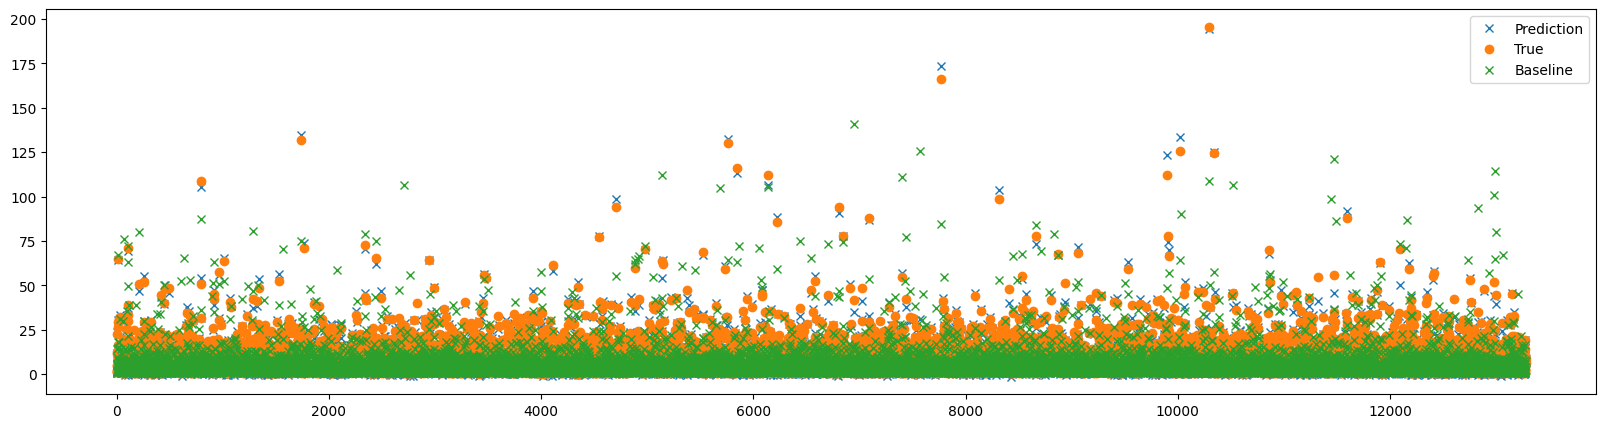

In [7]:
train_y_true = train_data_y
train_y_pred = model.predict(train_data_x)
train_y_baseline_model = model_baseline(train_data_x[:, 0])

plt.figure(figsize=(20, 5))
plt.plot(train_y_pred, 'x', label="Prediction")
plt.plot(train_y_true, 'o', label="True")
plt.plot(train_y_baseline_model, 'x', label="Baseline")
plt.legend()

In [8]:
test_y_true = test_data_y
test_y_pred = model.predict(test_data_x)
test_y_baseline_model = model_baseline(test_data_x[:, 0])


rsquared_train_lin_reg = sklearn.metrics.r2_score(train_y_true, train_y_pred)
rsquared_test_lin_reg  = sklearn.metrics.r2_score(test_y_true, test_y_pred)
rsquared_train_baseline  = sklearn.metrics.r2_score(train_y_true, train_y_baseline_model)
rsquared_test_baseline  = sklearn.metrics.r2_score(test_y_true, test_y_baseline_model)

print(f"R-squared (train, Linear Regression) = {rsquared_train_lin_reg:.4f}")
print(f"R-squared (test, Linear Regression)  = {rsquared_test_lin_reg:.4f}")
print(f"R-squared (train, Baseline)          = {rsquared_train_baseline:.4f}")
print(f"R-squared (test, Baseline)           = {rsquared_test_baseline:.4f}")

rms_err_train_lin_reg = sklearn.metrics.root_mean_squared_error(train_y_true, train_y_pred)
rms_err_test_lin_reg  = sklearn.metrics.root_mean_squared_error(test_y_true, test_y_pred)
rms_err_train_baseline  = sklearn.metrics.root_mean_squared_error(train_y_true, train_y_baseline_model)
rms_err_test_baseline   = sklearn.metrics.root_mean_squared_error(test_y_true, test_y_baseline_model)
print("-------------------------------------------------------------------------")
print(f"RMS error (train, Linear Regression) = {rms_err_train_lin_reg:.4f}")
print(f"RMS error (test, Linear Regression)  = {rms_err_test_lin_reg:.4f}")
print(f"RMS error (train, Baseline)          = {rms_err_train_baseline:.4f}")
print(f"RMS error (test, Baseline)           = {rms_err_test_baseline:.4f}")

R-squared (train, Linear Regression) = 0.9879
R-squared (test, Linear Regression)  = 0.9891
R-squared (train, Baseline)          = 0.2756
R-squared (test, Baseline)           = 0.3566
-------------------------------------------------------------------------
RMS error (train, Linear Regression) = 0.9229
RMS error (test, Linear Regression)  = 0.9358
RMS error (train, Baseline)          = 7.1440
RMS error (test, Baseline)           = 7.1893


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [10]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(10),
              'linearregression__fit_intercept': [True],
              }

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=4, verbose=4)


In [12]:
empirical_data_x, empirical_data_y = empirical_data.iloc[:, 0:6].to_numpy(), empirical_data.iloc[:, 6].to_numpy()
grid.fit(empirical_data_x,empirical_data_y)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4] END linearregression__fit_intercept=True, polynomialfeatures__degree=0;, score=-0.014 total time=   0.0s
[CV 2/4] END linearregression__fit_intercept=True, polynomialfeatures__degree=0;, score=-0.012 total time=   0.0s
[CV 3/4] END linearregression__fit_intercept=True, polynomialfeatures__degree=0;, score=-0.004 total time=   0.0s
[CV 4/4] END linearregression__fit_intercept=True, polynomialfeatures__degree=0;, score=-0.022 total time=   0.0s
[CV 1/4] END linearregression__fit_intercept=True, polynomialfeatures__degree=1;, score=0.987 total time=   0.0s
[CV 2/4] END linearregression__fit_intercept=True, polynomialfeatures__degree=1;, score=0.990 total time=   0.0s
[CV 3/4] END linearregression__fit_intercept=True, polynomialfeatures__degree=1;, score=0.981 total time=   0.0s
[CV 4/4] END linearregression__fit_intercept=True, polynomialfeatures__degree=1;, score=0.987 total time=   0.0s
[CV 1/4] END linearregression__

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True],
                         'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=4)

In [15]:
grid.best_params_

{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 3}

In [42]:
poly_reg_model = PolynomialRegression(degree=grid.best_params_['polynomialfeatures__degree'], fit_intercept=grid.best_params_['linearregression__fit_intercept'])
poly_reg_model.fit(train_data_x, train_data_y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [43]:
train_polyreg_pred_y = poly_reg_model.predict(train_data_x)
rsquared_train_poly_reg = sklearn.metrics.r2_score(train_data_y, train_polyreg_pred_y)

test_polyreg_pred_y =poly_reg_model.predict(test_data_x)
rsquared_test_poly_reg =sklearn.metrics.r2_score(test_data_y, test_polyreg_pred_y)

print(f"rsquared_test_poly_reg = {rsquared_test_poly_reg:.4f}")
print(f"rsquared_train_poly_reg = {rsquared_train_poly_reg:.4f}")



rsquared_test_poly_reg = 1.0000
rsquared_train_poly_reg = 1.0000


In [44]:
rms_err_train_poly_reg = sklearn.metrics.root_mean_squared_error(train_y_true, train_polyreg_pred_y)
rms_err_test_poly_reg  = sklearn.metrics.root_mean_squared_error(test_y_true, test_polyreg_pred_y)

print(f"rms_train_poly_reg = {rms_err_train_poly_reg:.4f}")
print(f"rms_test_poly_reg = {rms_err_test_poly_reg:.4f}")

rms_train_poly_reg = 0.0096
rms_test_poly_reg = 0.0139
